In [ ]:
#import packages
import pandas as pd 
import numpy as np
from scipy.io import loadmat 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer




#load dataset
df = pd.read_csv('student_lifestyle_dataset_full..csv')


In [ ]:
#get an idea of the dataset
print(df.head())
print(df.info())
print(df.describe())


   Student_ID  Study_Hours_Per_Day  ...  Gender  Grades
0           1                  6.9  ...    Male    7.48
1           2                  5.3  ...  Female    6.88
2           3                  5.1  ...    Male    6.68
3           4                  6.5  ...    Male    7.20
4           5                  8.1  ...    Male    8.78

[5 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   Stress_Level                     20

<Axes: xlabel='Stress_Level', ylabel='Count'>

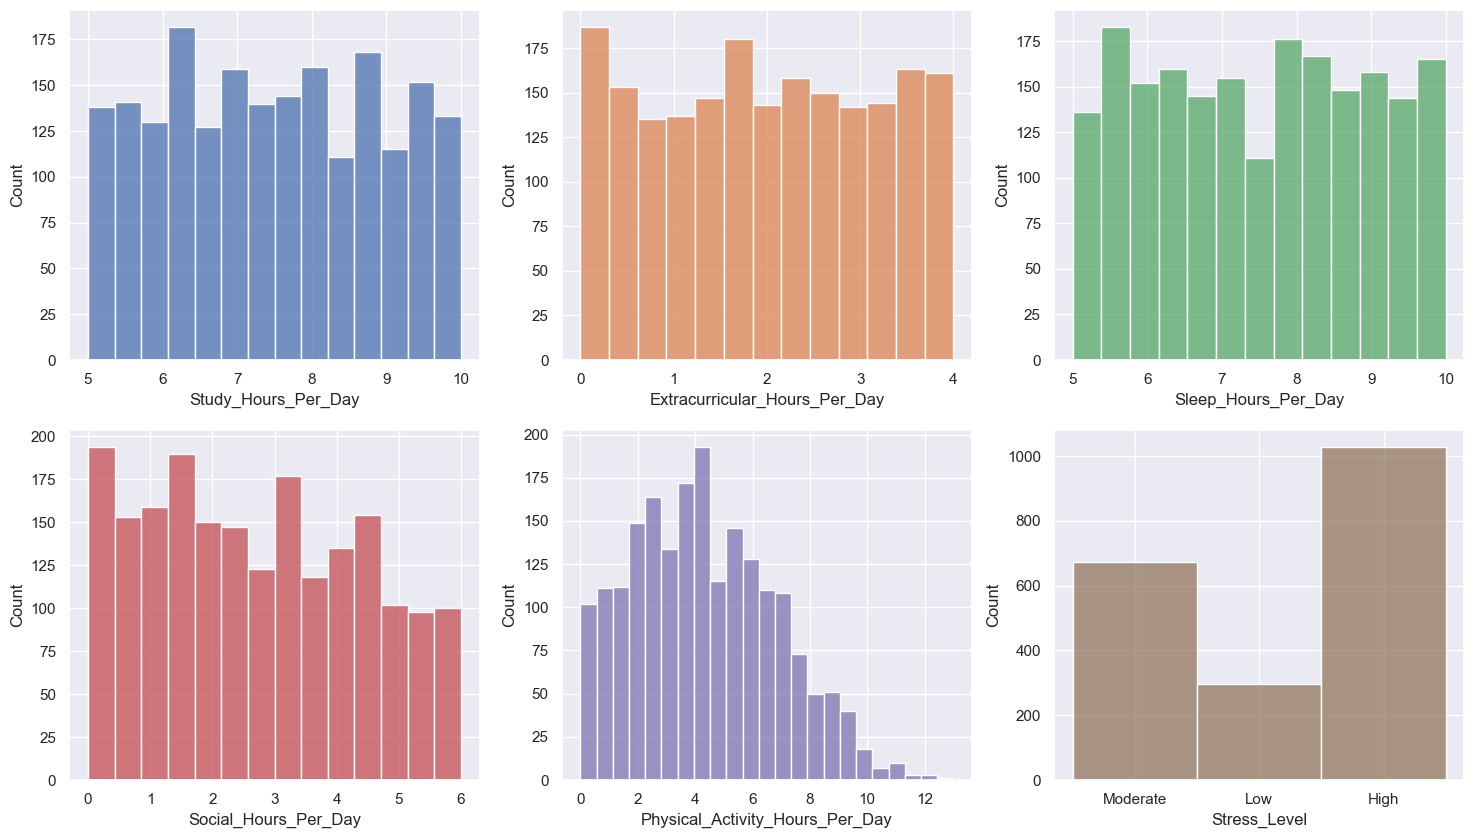

In [72]:
#visualise using seaborn 

palette = sns.color_palette('deep', 7)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(ax=axes[0, 0], data=df, x='Study_Hours_Per_Day',color=palette[0])
sns.histplot(ax=axes[0, 1], data=df, x='Extracurricular_Hours_Per_Day', color=palette[1])
sns.histplot(ax=axes[0, 2], data=df, x='Sleep_Hours_Per_Day', color=palette[2])
sns.histplot(ax=axes[1, 0], data=df, x='Social_Hours_Per_Day', color=palette[3])
sns.histplot(ax=axes[1, 1], data=df, x='Physical_Activity_Hours_Per_Day', color=palette[4])
sns.histplot(ax=axes[1, 2], data=df, x='Stress_Level', color=palette[5])


<Axes: xlabel='Grades', ylabel='Count'>

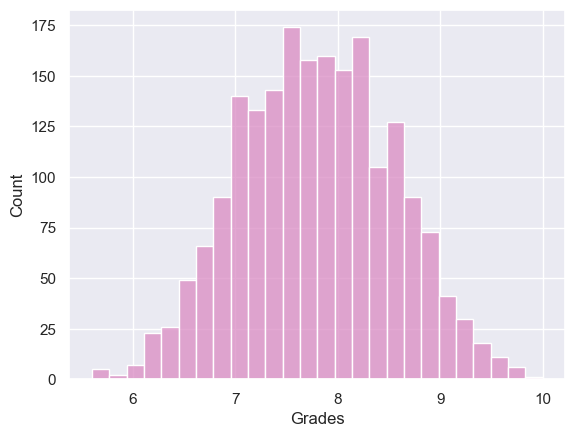

In [74]:
sns.histplot(data=df, x='Grades', color=palette[6])